<a href="https://colab.research.google.com/github/dlvvkfl88/MSAISCHOOL/blob/main/MS_AI_SCHOOL_42%EC%9D%BC%EC%B0%A8_%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
#시계열 데이터 생성
np.random.seed(0)
n = 100 #데이터 포인트 수
ar_params = [0.7] #자기회귀 계수
ma_params = [0.4,-0.2] #이동평균 계수


residuals= np.random.normal(0, 1, n) # *


#ARMA (1, 2)
data = [0,0]
for i in range (2, n):
  ar_term = ar_params[0] * data[i-1]
  ma_term = ma_params[0] * residuals[i-1] + ma_params[1]* residuals[i-2] 
  data.append(ar_term + ma_term + residuals[i])
#데이터프레임 생성

df = pd.DataFrame({'Value': data})

print(df)


       Value
0   0.000000
1   0.000000
2   0.785990
3   3.102550
4   4.739953
..       ...
95  2.160229
96  1.734016
97  2.862567
98  2.842957
99  2.085650

[100 rows x 1 columns]


In [ ]:
model = ARIMA(df['Value'], order=(1,0,2))
results = model.fit()

In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -140.937
Date:                Thu, 01 Jun 2023   AIC                            291.874
Time:                        00:24:15   BIC                            304.900
Sample:                             0   HQIC                           297.146
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1564      0.510      0.307      0.759      -0.842       1.155
ar.L1          0.7647      0.129      5.934      0.000       0.512       1.017
ma.L1          0.3757      0.158      2.382      0.0

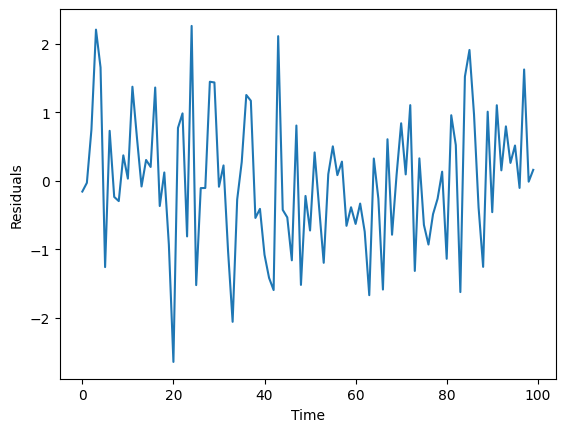

In [ ]:
#잔차 시계열 그래프 출력

plt.plot(results.resid) 
plt.xlabel('Time') 
plt.ylabel('Residuals')
plt.show()

In [ ]:
best_aic = np.inf
best_order = None

In [ ]:
for p in range(3):
  for d in range(2):
    for q in range(3):
      order = (p,d,q)
      try:
        model = ARIMA(data, order=order)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
          best_aic = aic
          best_order = order
      except:
        continue


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
print("Best AIC:", best_aic)
print("Best Order:", best_order)

Best AIC: 286.49379664077424
Best Order: (1, 1, 2)


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
 

In [ ]:
np.random.seed(10)
n = 100
data = np.random.normal(0,1,n)
dates = pd.date_range(start='2022-01-01', periods=n, freq='M')

In [ ]:
df = pd.DataFrame({'Value':data}, index=dates)

In [ ]:
print(df)

               Value
2022-01-31  1.331587
2022-02-28  0.715279
2022-03-31 -1.545400
2022-04-30 -0.008384
2022-05-31  0.621336
...              ...
2029-12-31  0.918269
2030-01-31 -0.482093
2030-02-28  0.089588
2030-03-31  0.826999
2030-04-30 -1.954512

[100 rows x 1 columns]


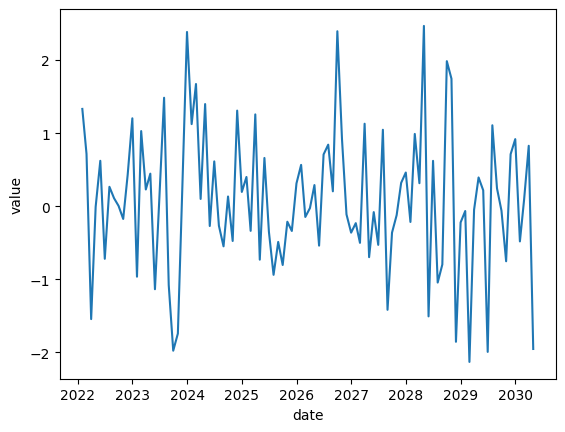

In [ ]:
plt.plot(df)
plt.xlabel('date')
plt.ylabel('value')
plt.show()

In [ ]:
model = SARIMAX(df, order =(1,1,1), seasonal_order = (1,1,1,12))
results = model.fit()

In [ ]:
forecast = results.get_forecast(steps=12)
print(forecast)

In [ ]:
pred = results.predict(start='2022-01-31', end='2030-04-30')

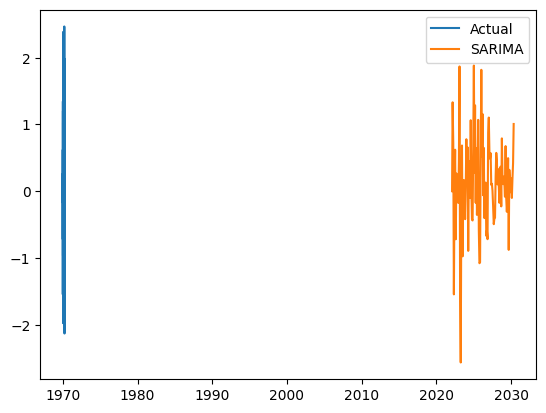

In [ ]:
plt.plot(data, label='Actual')
plt.plot(pred, label='SARIMA')
plt.legend()
plt.show()

In [2]:
# 예시 데이터 생성
x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])
z = np.array([3,6,9,12,15])

# 공분산 계산 
cov_matrix = np.cov([x,y,z])
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 2.5  5.   7.5]
 [ 5.  10.  15. ]
 [ 7.5 15.  22.5]]


In [3]:
# 상관 행렬 계산
cor_matrix = np.corrcoef([x,y,z])
print("\nCorrelation Matrix:")
print(cor_matrix)


Correlation Matrix:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [5]:
# 예시 데이터 생성
x1 = np.array([1,2,3,4,5])
x2 = np.array([2,4,6,8,10])
x3 = np.array([3,6,9,12,15])

# 데이터 행렬 생성
data = np.vstack([x1,x2,x3]).T

# 상관 행렬 계산
cor_matrix = np.corrcoef(data, rowvar=False)
# 각 변수들 간의 상관 계수 추력
print("Correlation Coefficients:")
print(cor_matrix)

# 다중공선성 판단 
threshold =0.7 # 상관계수 임계값 성정

print("\nVarialbes with high multicollinearity:")
for i in range(cor_matrix.shape[0]):
  for j in range(i+1, cor_matrix.shape[1]):
    if abs(cor_matrix[i,j]) > threshold:
      print(f"Variable {i+1} and Variable {j+1} ")

Correlation Coefficients:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Varialbes with high multicollinearity:
Variable 1 and Variable 2 
Variable 1 and Variable 3 
Variable 2 and Variable 3 


In [6]:
import seaborn as sns


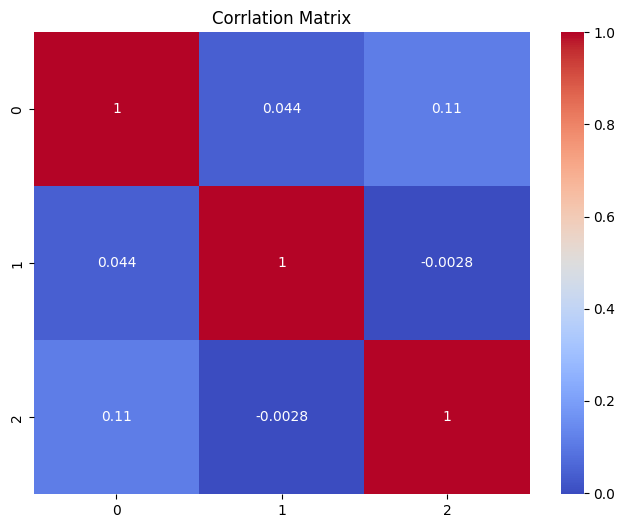

In [7]:
x1 = np.random.normal(0,1,100)
x2 = np.random.normal(0,1,100)
x3 = np.random.normal(0,1,100)

data = np.vstack([x1,x2,x3]).T # 데이터 행렬 생생

# 상관 행렬 계산 
cor_matrix = np.corrcoef(data, rowvar=False)

# 히트맵 상관 행렬 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cor_matrix, annot =True, cmap='coolwarm')
plt.title('Corrlation Matrix')
plt.show()

In [8]:
# 상관 계수의 절댁삾이 일정 임계값 이상인 변수 선택

threshold =0.3

In [12]:
selected_vars = []
for i in range(cor_matrix.shape[0]):
  for j in range(i+1, cor_matrix.shape[1]):
    if abs(cor_matrix[i,j]) > threshold:
      selected_vars.extend([i.j])

# 선택된 변수들로 차원 축소된 데이터 생성
if selected_vars:
  reduced_data = data[:, list(set(selected_vars))]


  # 차원 축소된 데이터 시각화
  plet.figure(figsize=(8,6))
  plt.scatter(reduced_data[:,0], reduced_data[:,1])
  plt.xlabel('Reduced Varibale 1')
  plt.ylabel('Reduced Varibale 2')
  plt.title('Dimensionality Reduced Data')
  plt.show()
else:
  print("데이터셋에서 선택된 변수가 없어 차원 축소가 이루어지지 않았음")



데이터셋에서 선택된 변수가 없어 차원 축소가 이루어지지 않았음


In [28]:
import seaborn as sns
tips= sns.load_dataset('tips')


In [17]:
corr = tips['total_bill'].corr(tips['tip'], method='pearson')
print('Pearson correlation coefficient:', corr)

Pearson correlation coefficient: 0.6757341092113641


In [18]:
print(type(tips))

<class 'pandas.core.frame.DataFrame'>


In [20]:
corr= tips.corr()
print(corr)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<ipython-input-20-c9fafeaffbda>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= tips.corr()


In [21]:
import numpy as np
import pandas as pd

np.random.seed(42)
math_scores = np.random.normal(loc=70, scale=10, size=(300,))
english_scores = np.random.normal(loc=80, scale=8, size=(300,))
korean_scores = np.random.normal(loc=75, scale=12, size=(300,))

In [22]:
grades = np.repeat([1,2,3], 100)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [23]:
df = pd.DataFrame({
    'Grade':grades,
    'Math':math_scores,
    'English':english_scores,
    'Korea':korean_scores
})

In [24]:
df.to_csv('/content/sample_data/studen_score.csv', index=False)

In [30]:
df = pd.to_csv('/content/sample_data/studen_score.csv')
df

AttributeError: ignored

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
plt.sns(df['Math'], bins=10)
plt.show()

AttributeError: ignored

In [34]:
corr = df.corr()
import seaborn as sns


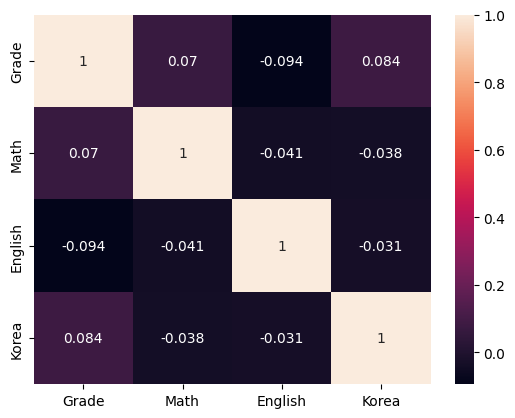

In [35]:
sns.heatmap(corr, annot= True)
plt.show()

## 주성분 분석 (PCA)개요

In [36]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [37]:
x = np.random.randn(100,3)


array([[ 0.36867331, -0.39333881,  0.02874482],
       [ 1.27845186,  0.19109907,  0.04643655],
       [-1.35985614,  0.74625357,  0.64548418],
       [ 2.16325472, -0.30777823,  0.21915033],
       [ 0.24938368,  1.57745328, -0.09529553],
       [ 0.27902153,  0.60789651,  0.18660912],
       [-0.44643361,  0.19408999,  1.07363175],
       [-1.0265153 ,  0.13296967, -0.70012081],
       [ 1.19504663, -1.5231869 , -0.55892185],
       [ 0.37721188,  1.56552403, -0.06575026],
       [-0.55519953,  1.88115707, -1.4480139 ],
       [-2.19880596,  0.44001445, -0.50205422],
       [-1.02123282,  0.70835645,  0.24380071],
       [-0.56407863, -1.2803044 ,  0.87245733],
       [ 0.65020118, -0.09917586,  1.846637  ],
       [-1.07008477, -1.52552517, -0.69190807],
       [-0.04558602,  0.24333945, -0.24123606],
       [ 0.3520554 , -1.25153942,  1.4437646 ],
       [-0.08215118,  1.11729583,  0.34272535],
       [ 0.45675322,  0.56976728,  0.44770856],
       [ 0.64272276,  1.32915253,  0.196

In [38]:
pca = PCA(n_components=3)
pca.fit(x)

PCA(n_components=3)

In [39]:
transformed_data = pca.transform(x)

In [40]:
explained_var_ratio = pca.explained_variance_ratio_
print(f"주성분 설명력:{explained_var_ratio}")

주성분 설명력:[0.37755191 0.34786489 0.27458321]


In [41]:
components = pca.components_


In [42]:
print("주성분의 가중치\n",components)

주성분의 가중치
 [[-0.74556682  0.60512237  0.27920787]
 [-0.44614352 -0.1419778  -0.8836279 ]
 [-0.49506168 -0.78337043  0.37582536]]


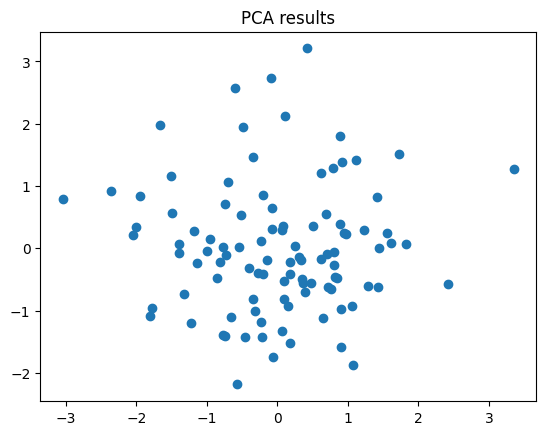

In [43]:
# 변환된 데이터 시각화

plt.scatter(transformed_data[:,0],transformed_data[:,1])
plt.title('PCA results')
plt.show()